In [33]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import numpy as np 
import matplotlib.pyplot as plt 


In [34]:
filename = 'DatasT0_hidden2_32_n6_k4.00.npz'

data = np.load(filename, allow_pickle=True)
for var_name in data.files:
    var = data[var_name]
    print(f"Variable name: {var_name}")
    print(f"Variable shape: {var.shape}")

batch, n, dim = data['sample_shape']
kappa = data['kappa']
hidden_DF = data['hidden_DF']
loss_history = data['loss_history']
x = data['x']
z = data['z']

Variable name: sample_shape
Variable shape: (3,)
Variable name: hidden_DF
Variable shape: (2,)
Variable name: kappa
Variable shape: ()
Variable name: loss_history
Variable shape: (1001, 5)
Variable name: x
Variable shape: (8192, 6, 2)
Variable name: z
Variable shape: (8192, 6, 2)
Variable name: params
Variable shape: ()


In [35]:
print("================================================================================")
print("shape ", [batch, n, dim],
        ", kappa", kappa,
        ", hidden", hidden_DF)
print("--------------------------------------------------------------------------------")

shape  [8192, 6, 2] , kappa 4.0 , hidden [ 2 32]
--------------------------------------------------------------------------------


In [36]:
for i in range(loss_history.shape[0]):
    [Eloc_mean, Eloc_err, Ek_mean, Ep_mean, acc] = loss_history[i]
    print(i, 
          ". acc =",  "{:.3f}".format(acc),
          ", E =",    "{:.3f}".format(Eloc_mean), 
          ", err =",  "{:.3f}".format(Eloc_err), 
          ", Ek =",   "{:.3f}".format(Ek_mean), 
          ", Ep =",   "{:.3f}".format(Ep_mean))

0 . acc = 0.677 , E = 61.604 , err = 0.103 , Ek = 11.703 , Ep = 49.900
1 . acc = 0.690 , E = 58.832 , err = 0.096 , Ek = 10.665 , Ep = 48.167
2 . acc = 0.703 , E = 56.176 , err = 0.090 , Ek = 9.712 , Ep = 46.464
3 . acc = 0.716 , E = 53.620 , err = 0.083 , Ek = 8.741 , Ep = 44.879
4 . acc = 0.729 , E = 51.194 , err = 0.074 , Ek = 7.889 , Ep = 43.304
5 . acc = 0.742 , E = 49.129 , err = 0.067 , Ek = 7.123 , Ep = 42.006
6 . acc = 0.754 , E = 47.182 , err = 0.060 , Ek = 6.373 , Ep = 40.809
7 . acc = 0.765 , E = 45.509 , err = 0.052 , Ek = 5.710 , Ep = 39.799
8 . acc = 0.777 , E = 44.220 , err = 0.047 , Ek = 5.116 , Ep = 39.104
9 . acc = 0.788 , E = 43.159 , err = 0.040 , Ek = 4.581 , Ep = 38.578
10 . acc = 0.798 , E = 42.398 , err = 0.033 , Ek = 4.099 , Ep = 38.300
11 . acc = 0.808 , E = 42.053 , err = 0.031 , Ek = 3.662 , Ep = 38.391
12 . acc = 0.817 , E = 42.125 , err = 0.033 , Ek = 3.275 , Ep = 38.849
13 . acc = 0.823 , E = 42.414 , err = 0.033 , Ek = 2.998 , Ep = 39.416
14 . acc = 0.8

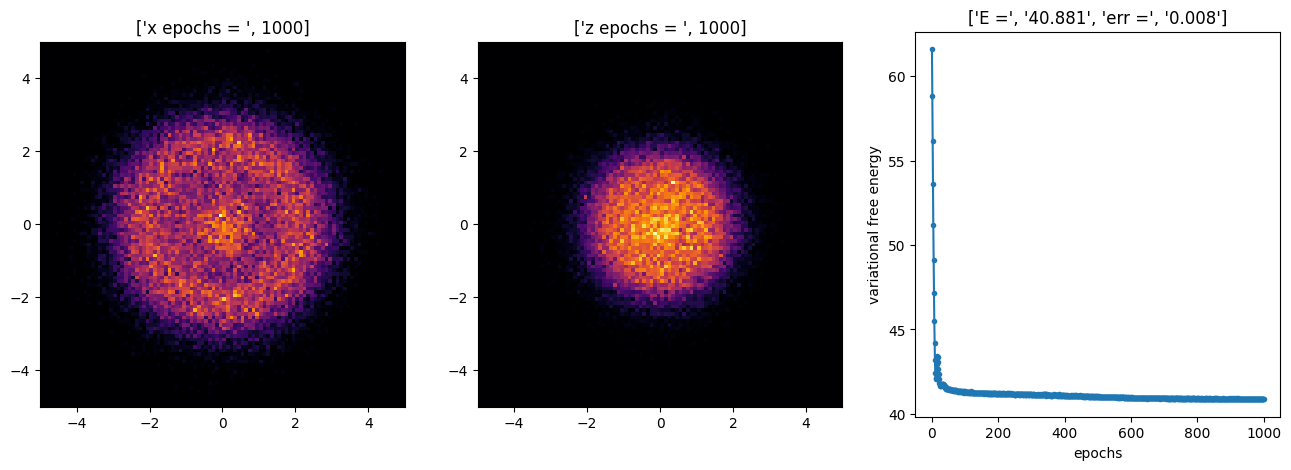

In [37]:
fig = plt.figure(figsize=(16, 5))

x0 = jnp.reshape(x, (batch*n, dim)) 
## figure 1
plt.subplot(1, 3, 1, aspect=1)
plt.title(['x epochs = ', i])
H, xedges, yedges = np.histogram2d(x0[:, 0], x0[:, 1], bins=100, 
                                    range=((-5, 5), (-5, 5)), density=True)
plt.imshow(H, interpolation="nearest", 
            extent=(xedges[0], xedges[-1], yedges[0], yedges[-1]), cmap="inferno")
plt.xlim([-5, 5])
plt.ylim([-5, 5])

z0 = jnp.reshape(z, (batch*n, dim)) 
## figure 2
plt.subplot(1, 3, 2, aspect=1)
plt.title(['z epochs = ', i])
H, xedges, yedges = np.histogram2d(z0[:, 0], z0[:, 1], bins=100, 
                                    range=((-5, 5), (-5, 5)), density=True)
plt.imshow(H, interpolation="nearest", 
            extent=(xedges[0], xedges[-1], yedges[0], yedges[-1]), cmap="inferno")
plt.xlim([-5, 5])
plt.ylim([-5, 5])

## figure 3
plt.subplot(1, 3, 3)
plt.title(['E =', "{:.3f}".format(Eloc_mean), 'err =', "{:.3f}".format(Eloc_err)])
px = np.arange(i+1)
py = np.array(loss_history)
plt.plot(px, py[:, 0], marker='.')
plt.xlabel('epochs')
plt.ylabel('variational free energy')
plt.show()